In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygame
import seaborn as sns
import random

# our classes
from agent import Agent, SARSAAgent
from environment import Environment
from screen import Screen

pygame 2.0.0 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


Configurações gerais para a execução dos modelos:

* O espaço de ações é denifido como uma matriz identidade 3x3
* Há três ações possíveis (continuar na mesma direção, virar para a esquerda, virar para a direita)
* Como cada estado é representado por um vetor binário de 11 posições, ao todo há 2^11 estados possíveis

In [2]:
# define environment
ACTION_SPACE = np.eye(3)
NUM_ACTIONS = 3
NUM_STATES = 2 ** 11

In [3]:
# Set options to activate or deactivate the game view, and its speed
pygame.font.init()

In [4]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['episodes'])
    for i in range(n):
        episode = metrics['episodes'][i]
        score = metrics['scores'][i]
        reward = metrics['rewards'][i]

        formatted_dict['episodes'].append(episode)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(episode)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)


def decode_state(encoded_state):
    """
    Decode a binary representation of a state into its decimal base;
    
    encoded_state: an array of 0s and 1s representing a binary value
    
    return: decimal value
    """
    decoded = ''
    for s in encoded_state:
        decoded += str(s)

    return int(decoded, 2)


def decode_action(encoded_action):
    if isinstance(encoded_action, np.ndarray):
        return encoded_action.argmax()
    return encoded_action


A função de recompensa padrão é definida como:
    
* Ganha 10 pontos por comer a maçã
* Perde 10 pontos por morrer
* Recompensa 0 caso contrário

In [5]:
def default_reward(env):
    """
    Return the reward.
    The reward is:
        -10 when Snake crashes.
        +10 when Snake eats food
        0 otherwise
    """
    reward = 0
    if env.game.crash:
        reward = -10
    elif env.player.eaten:
        reward = 10

    return reward

# SARSA

Seguiremos os mesmos experimentos realizados com o Q-Learning, de modo a verificarmos a diferença nos resultados variando apenas o agente.

In [6]:
def run_sarsa(agent: Agent, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()

        state1, done = env.reset()
        state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            state2 = decode_state(state2)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            agent.update(state1, state2, reward, decoded_action1, decoded_action2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
        

    return metrics

### Experimento 1: Baseline

* N0 = 1
* gamma = 1
* número de episódios = 150

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 3
Game 29      Score: 5
Game 30      Score: 4
Game 31      Score: 7
Game 32      Score: 4
Game 33      Score: 5
Game 34      Score: 2
Game 35      Score: 3
Game 36      Score: 3
Game 37      Score: 4
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 4
Game 41      Score: 4
Game 42      Score: 7
Game 43      Score: 3
Game 44      Score: 4
Game 45      Score: 11
Game 46      Score

Game 355      Score: 28
Game 356      Score: 14
Game 357      Score: 34
Game 358      Score: 33
Game 359      Score: 14
Game 360      Score: 39
Game 361      Score: 26
Game 362      Score: 25
Game 363      Score: 19
Game 364      Score: 25
Game 365      Score: 25
Game 366      Score: 2
Game 367      Score: 26
Game 368      Score: 27
Game 369      Score: 21
Game 370      Score: 18
Game 371      Score: 38
Game 372      Score: 26
Game 373      Score: 29
Game 374      Score: 30
Game 375      Score: 42
Game 376      Score: 23
Game 377      Score: 22
Game 378      Score: 21
Game 379      Score: 15
Game 380      Score: 24
Game 381      Score: 33
Game 382      Score: 27
Game 383      Score: 28
Game 384      Score: 21
Game 385      Score: 25
Game 386      Score: 32
Game 387      Score: 33
Game 388      Score: 21
Game 389      Score: 26
Game 390      Score: 41
Game 391      Score: 31
Game 392      Score: 24
Game 393      Score: 35
Game 394      Score: 11
Game 395      Score: 17
Game 396      Sco

Game 700      Score: 37
Game 701      Score: 36
Game 702      Score: 45
Game 703      Score: 32
Game 704      Score: 36
Game 705      Score: 33
Game 706      Score: 34
Game 707      Score: 51
Game 708      Score: 26
Game 709      Score: 19
Game 710      Score: 33
Game 711      Score: 40
Game 712      Score: 31
Game 713      Score: 34
Game 714      Score: 45
Game 715      Score: 42
Game 716      Score: 18
Game 717      Score: 35
Game 718      Score: 9
Game 719      Score: 14
Game 720      Score: 22
Game 721      Score: 24
Game 722      Score: 21
Game 723      Score: 38
Game 724      Score: 24
Game 725      Score: 52
Game 726      Score: 26
Game 727      Score: 38
Game 728      Score: 48
Game 729      Score: 56
Game 730      Score: 16
Game 731      Score: 16
Game 732      Score: 43
Game 733      Score: 26
Game 734      Score: 39
Game 735      Score: 20
Game 736      Score: 43
Game 737      Score: 32
Game 738      Score: 35
Game 739      Score: 26
Game 740      Score: 20
Game 741      Sco

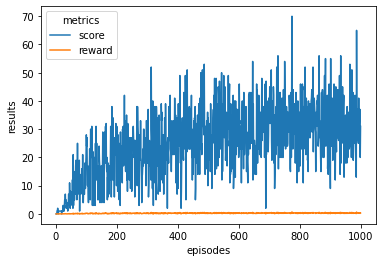

Run time: 30.816160678863525 seconds
Max. Score: 70
Mean Last Scores: 30.96


In [25]:
N0 = 1
gamma = 1

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 3
Game 29      Score: 5
Game 30      Score: 4
Game 31      Score: 7
Game 32      Score: 4
Game 33      Score: 5
Game 34      Score: 2
Game 35      Score: 3
Game 36      Score: 3
Game 37      Score: 4
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 4
Game 41      Score: 4
Game 42      Score: 7
Game 43      Score: 3
Game 44      Score: 4
Game 45      Score: 11
Game 46      Score

Game 356      Score: 27
Game 357      Score: 43
Game 358      Score: 27
Game 359      Score: 20
Game 360      Score: 30
Game 361      Score: 13
Game 362      Score: 11
Game 363      Score: 27
Game 364      Score: 18
Game 365      Score: 5
Game 366      Score: 38
Game 367      Score: 27
Game 368      Score: 32
Game 369      Score: 37
Game 370      Score: 33
Game 371      Score: 28
Game 372      Score: 49
Game 373      Score: 30
Game 374      Score: 22
Game 375      Score: 30
Game 376      Score: 22
Game 377      Score: 43
Game 378      Score: 23
Game 379      Score: 30
Game 380      Score: 44
Game 381      Score: 21
Game 382      Score: 33
Game 383      Score: 33
Game 384      Score: 38
Game 385      Score: 42
Game 386      Score: 34
Game 387      Score: 46
Game 388      Score: 22
Game 389      Score: 32
Game 390      Score: 12
Game 391      Score: 25
Game 392      Score: 20
Game 393      Score: 22
Game 394      Score: 29
Game 395      Score: 28
Game 396      Score: 24
Game 397      Sco

Game 698      Score: 33
Game 699      Score: 37
Game 700      Score: 37
Game 701      Score: 18
Game 702      Score: 43
Game 703      Score: 16
Game 704      Score: 52
Game 705      Score: 34
Game 706      Score: 41
Game 707      Score: 30
Game 708      Score: 41
Game 709      Score: 33
Game 710      Score: 42
Game 711      Score: 52
Game 712      Score: 41
Game 713      Score: 48
Game 714      Score: 56
Game 715      Score: 45
Game 716      Score: 50
Game 717      Score: 52
Game 718      Score: 29
Game 719      Score: 25
Game 720      Score: 29
Game 721      Score: 41
Game 722      Score: 23
Game 723      Score: 28
Game 724      Score: 16
Game 725      Score: 42
Game 726      Score: 42
Game 727      Score: 30
Game 728      Score: 39
Game 729      Score: 22
Game 730      Score: 40
Game 731      Score: 25
Game 732      Score: 20
Game 733      Score: 32
Game 734      Score: 29
Game 735      Score: 36
Game 736      Score: 11
Game 737      Score: 34
Game 738      Score: 24
Game 739      Sc

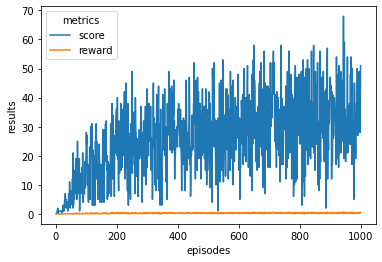

Run time: 28.250312566757202 seconds
Max. Score: 68
Mean Last Scores: 33.0


In [8]:
N0 = 1
gamma = 0.99

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 3
Game 29      Score: 5
Game 30      Score: 4
Game 31      Score: 7
Game 32      Score: 4
Game 33      Score: 5
Game 34      Score: 2
Game 35      Score: 3
Game 36      Score: 3
Game 37      Score: 4
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 4
Game 41      Score: 4
Game 42      Score: 7
Game 43      Score: 3
Game 44      Score: 4
Game 45      Score: 11
Game 46      Score

Game 354      Score: 19
Game 355      Score: 19
Game 356      Score: 19
Game 357      Score: 26
Game 358      Score: 31
Game 359      Score: 43
Game 360      Score: 19
Game 361      Score: 20
Game 362      Score: 18
Game 363      Score: 25
Game 364      Score: 18
Game 365      Score: 19
Game 366      Score: 18
Game 367      Score: 16
Game 368      Score: 39
Game 369      Score: 34
Game 370      Score: 20
Game 371      Score: 30
Game 372      Score: 37
Game 373      Score: 17
Game 374      Score: 32
Game 375      Score: 15
Game 376      Score: 19
Game 377      Score: 16
Game 378      Score: 19
Game 379      Score: 28
Game 380      Score: 30
Game 381      Score: 20
Game 382      Score: 31
Game 383      Score: 34
Game 384      Score: 19
Game 385      Score: 24
Game 386      Score: 11
Game 387      Score: 28
Game 388      Score: 26
Game 389      Score: 32
Game 390      Score: 27
Game 391      Score: 25
Game 392      Score: 21
Game 393      Score: 29
Game 394      Score: 43
Game 395      Sc

Game 700      Score: 47
Game 701      Score: 13
Game 702      Score: 35
Game 703      Score: 39
Game 704      Score: 27
Game 705      Score: 21
Game 706      Score: 46
Game 707      Score: 19
Game 708      Score: 36
Game 709      Score: 15
Game 710      Score: 34
Game 711      Score: 32
Game 712      Score: 25
Game 713      Score: 36
Game 714      Score: 22
Game 715      Score: 20
Game 716      Score: 40
Game 717      Score: 25
Game 718      Score: 29
Game 719      Score: 18
Game 720      Score: 33
Game 721      Score: 40
Game 722      Score: 15
Game 723      Score: 12
Game 724      Score: 36
Game 725      Score: 17
Game 726      Score: 49
Game 727      Score: 32
Game 728      Score: 38
Game 729      Score: 8
Game 730      Score: 41
Game 731      Score: 29
Game 732      Score: 27
Game 733      Score: 36
Game 734      Score: 29
Game 735      Score: 35
Game 736      Score: 29
Game 737      Score: 28
Game 738      Score: 33
Game 739      Score: 42
Game 740      Score: 12
Game 741      Sco

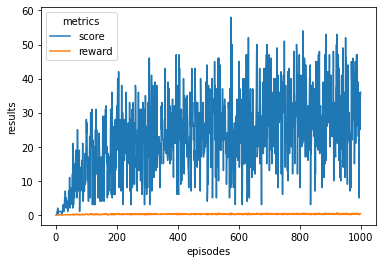

Run time: 26.12573480606079 seconds
Max. Score: 58
Mean Last Scores: 30.46


In [9]:
N0 = 1
gamma = 0.98

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 3
Game 29      Score: 5
Game 30      Score: 4
Game 31      Score: 7
Game 32      Score: 4
Game 33      Score: 5
Game 34      Score: 2
Game 35      Score: 3
Game 36      Score: 3
Game 37      Score: 4
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 4
Game 41      Score: 4
Game 42      Score: 7
Game 43      Score: 3
Game 44      Score: 4
Game 45      Score: 11
Game 46      Score

Game 357      Score: 42
Game 358      Score: 31
Game 359      Score: 30
Game 360      Score: 23
Game 361      Score: 20
Game 362      Score: 17
Game 363      Score: 21
Game 364      Score: 22
Game 365      Score: 22
Game 366      Score: 14
Game 367      Score: 10
Game 368      Score: 20
Game 369      Score: 24
Game 370      Score: 15
Game 371      Score: 24
Game 372      Score: 13
Game 373      Score: 48
Game 374      Score: 16
Game 375      Score: 27
Game 376      Score: 3
Game 377      Score: 26
Game 378      Score: 30
Game 379      Score: 38
Game 380      Score: 43
Game 381      Score: 24
Game 382      Score: 21
Game 383      Score: 29
Game 384      Score: 36
Game 385      Score: 19
Game 386      Score: 23
Game 387      Score: 35
Game 388      Score: 33
Game 389      Score: 21
Game 390      Score: 19
Game 391      Score: 13
Game 392      Score: 23
Game 393      Score: 21
Game 394      Score: 27
Game 395      Score: 22
Game 396      Score: 33
Game 397      Score: 40
Game 398      Sco

Game 702      Score: 45
Game 703      Score: 11
Game 704      Score: 22
Game 705      Score: 34
Game 706      Score: 28
Game 707      Score: 37
Game 708      Score: 24
Game 709      Score: 41
Game 710      Score: 47
Game 711      Score: 11
Game 712      Score: 43
Game 713      Score: 22
Game 714      Score: 49
Game 715      Score: 19
Game 716      Score: 42
Game 717      Score: 25
Game 718      Score: 2
Game 719      Score: 15
Game 720      Score: 41
Game 721      Score: 25
Game 722      Score: 34
Game 723      Score: 35
Game 724      Score: 18
Game 725      Score: 34
Game 726      Score: 59
Game 727      Score: 31
Game 728      Score: 23
Game 729      Score: 31
Game 730      Score: 45
Game 731      Score: 22
Game 732      Score: 34
Game 733      Score: 40
Game 734      Score: 49
Game 735      Score: 33
Game 736      Score: 25
Game 737      Score: 36
Game 738      Score: 35
Game 739      Score: 24
Game 740      Score: 23
Game 741      Score: 9
Game 742      Score: 55
Game 743      Scor

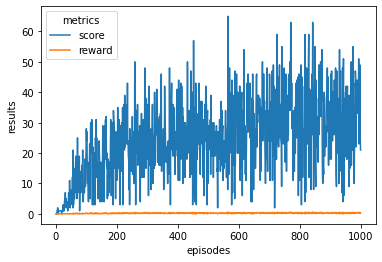

Run time: 28.081741333007812 seconds
Max. Score: 65
Mean Last Scores: 32.06


In [10]:
N0 = 1
gamma = 0.95

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Como no treinamento do modelo com ``gamma = 0.99`` o score apresenta uma tendência de crescimento que é maior que as demais, tomaremos 0.99 como o fator de desconto.

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 2
Game 6      Score: 1
Game 7      Score: 1
Game 8      Score: 1
Game 9      Score: 2
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 0
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 2
Game 24      Score: 1
Game 25      Score: 1
Game 26      Score: 4
Game 27      Score: 2
Game 28      Score: 1
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 1
Game 32      Score: 1
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 2


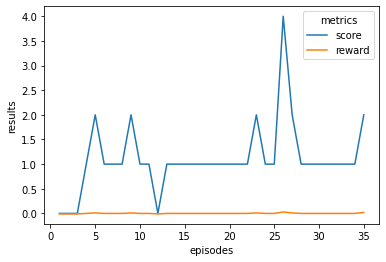

Run time: 600.010525226593 seconds
Max. Score: 4
Mean Last Scores: 1.1142857142857143


In [26]:
N0 = 0.75
gamma = 0.99

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 0
Game 15      Score: 0
Game 16      Score: 0
Game 17      Score: 0
Game 18      Score: 0
Game 19      Score: 0
Game 20      Score: 0
Game 21      Score: 0
Game 22      Score: 0
Game 23      Score: 0
Game 24      Score: 0
Game 25      Score: 0
Game 26      Score: 0
Game 27      Score: 0
Game 28      Score: 0
Game 29      Score: 0
Game 30      Score: 0
Game 31      Score: 0
Game 32      Score: 0
Game 33      Score: 0
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 1
Game 37      Score: 4
Game 38      Score: 4
Game 39      Score: 1
Game 40      Score: 1
Game 41      Score: 2
Game 42      Score: 0
Game 43      Score: 3
Game 44      Score: 2
Game 45      Score: 3
Game 46      Score:

Game 356      Score: 30
Game 357      Score: 15
Game 358      Score: 4
Game 359      Score: 16
Game 360      Score: 21
Game 361      Score: 23
Game 362      Score: 12
Game 363      Score: 15
Game 364      Score: 12
Game 365      Score: 32
Game 366      Score: 18
Game 367      Score: 28
Game 368      Score: 15
Game 369      Score: 11
Game 370      Score: 13
Game 371      Score: 11
Game 372      Score: 21
Game 373      Score: 21
Game 374      Score: 27
Game 375      Score: 17
Game 376      Score: 23
Game 377      Score: 9
Game 378      Score: 9
Game 379      Score: 33
Game 380      Score: 23
Game 381      Score: 25
Game 382      Score: 25
Game 383      Score: 14
Game 384      Score: 18
Game 385      Score: 3
Game 386      Score: 10
Game 387      Score: 17
Game 388      Score: 13
Game 389      Score: 13
Game 390      Score: 20
Game 391      Score: 23
Game 392      Score: 20
Game 393      Score: 30
Game 394      Score: 11
Game 395      Score: 26
Game 396      Score: 16
Game 397      Score:

Game 704      Score: 18
Game 705      Score: 19
Game 706      Score: 16
Game 707      Score: 15
Game 708      Score: 28
Game 709      Score: 23
Game 710      Score: 12
Game 711      Score: 11
Game 712      Score: 44
Game 713      Score: 15
Game 714      Score: 18
Game 715      Score: 12
Game 716      Score: 20
Game 717      Score: 14
Game 718      Score: 16
Game 719      Score: 24
Game 720      Score: 26
Game 721      Score: 28
Game 722      Score: 22
Game 723      Score: 11
Game 724      Score: 16
Game 725      Score: 30
Game 726      Score: 27
Game 727      Score: 22
Game 728      Score: 12
Game 729      Score: 8
Game 730      Score: 26
Game 731      Score: 31
Game 732      Score: 25
Game 733      Score: 24
Game 734      Score: 27
Game 735      Score: 11
Game 736      Score: 22
Game 737      Score: 22
Game 738      Score: 13
Game 739      Score: 33
Game 740      Score: 22
Game 741      Score: 21
Game 742      Score: 17
Game 743      Score: 17
Game 744      Score: 13
Game 745      Sco

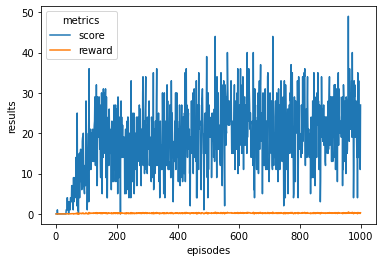

Run time: 43.579917192459106 seconds
Max. Score: 49
Mean Last Scores: 23.24


In [27]:
N0 = 0.5
gamma = 0.99

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 3
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 3
Game 13      Score: 3
Game 14      Score: 3
Game 15      Score: 0
Game 16      Score: 0
Game 17      Score: 1
Game 18      Score: 3
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 3
Game 22      Score: 3
Game 23      Score: 3
Game 24      Score: 4
Game 25      Score: 4
Game 26      Score: 4
Game 27      Score: 10
Game 28      Score: 2
Game 29      Score: 5
Game 30      Score: 3
Game 31      Score: 7
Game 32      Score: 5
Game 33      Score: 4
Game 34      Score: 4
Game 35      Score: 15
Game 36      Score: 6
Game 37      Score: 14
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 3
Game 41      Score: 8
Game 42      Score: 7
Game 43      Score: 3
Game 44      Score: 4
Game 45      Score: 11
Game 46      Sc

Game 356      Score: 16
Game 357      Score: 47
Game 358      Score: 36
Game 359      Score: 24
Game 360      Score: 18
Game 361      Score: 19
Game 362      Score: 5
Game 363      Score: 39
Game 364      Score: 42
Game 365      Score: 20
Game 366      Score: 13
Game 367      Score: 30
Game 368      Score: 23
Game 369      Score: 35
Game 370      Score: 35
Game 371      Score: 25
Game 372      Score: 25
Game 373      Score: 23
Game 374      Score: 41
Game 375      Score: 15
Game 376      Score: 17
Game 377      Score: 42
Game 378      Score: 10
Game 379      Score: 18
Game 380      Score: 6
Game 381      Score: 38
Game 382      Score: 23
Game 383      Score: 28
Game 384      Score: 24
Game 385      Score: 9
Game 386      Score: 17
Game 387      Score: 31
Game 388      Score: 16
Game 389      Score: 24
Game 390      Score: 13
Game 391      Score: 20
Game 392      Score: 26
Game 393      Score: 14
Game 394      Score: 28
Game 395      Score: 35
Game 396      Score: 25
Game 397      Score

Game 699      Score: 54
Game 700      Score: 22
Game 701      Score: 21
Game 702      Score: 40
Game 703      Score: 40
Game 704      Score: 6
Game 705      Score: 23
Game 706      Score: 20
Game 707      Score: 33
Game 708      Score: 14
Game 709      Score: 27
Game 710      Score: 51
Game 711      Score: 39
Game 712      Score: 33
Game 713      Score: 15
Game 714      Score: 13
Game 715      Score: 47
Game 716      Score: 20
Game 717      Score: 30
Game 718      Score: 33
Game 719      Score: 14
Game 720      Score: 34
Game 721      Score: 33
Game 722      Score: 22
Game 723      Score: 30
Game 724      Score: 22
Game 725      Score: 50
Game 726      Score: 22
Game 727      Score: 40
Game 728      Score: 44
Game 729      Score: 41
Game 730      Score: 19
Game 731      Score: 14
Game 732      Score: 52
Game 733      Score: 30
Game 734      Score: 8
Game 735      Score: 13
Game 736      Score: 30
Game 737      Score: 5
Game 738      Score: 13
Game 739      Score: 13
Game 740      Score

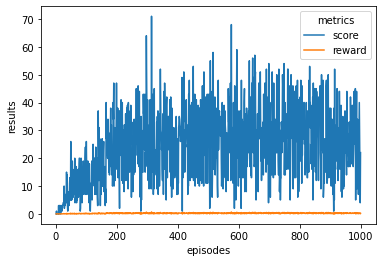

Run time: 256.46834087371826 seconds
Max. Score: 71
Mean Last Scores: 25.74


In [28]:
N0 = 0.25
gamma = 0.99

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 1
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 1
Game 7      Score: 1
Game 8      Score: 1
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 2
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 2
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 3
Game 21      Score: 1
Game 22      Score: 8
Game 23      Score: 2
Game 24      Score: 2
Game 25      Score: 2
Game 26      Score: 2
Game 27      Score: 1
Game 28      Score: 4
Game 29      Score: 3
Game 30      Score: 2
Game 31      Score: 2
Game 32      Score: 2
Game 33      Score: 1
Game 34      Score: 2
Game 35      Score: 2
Game 36      Score: 18
Game 37      Score: 0
Game 38      Score: 9
Game 39      Score: 11
Game 40      Score: 4
Game 41      Score: 7
Game 42      Score: 7
Game 43      Score: 9
Game 44      Score: 4
Game 45      Score: 15
Game 46      Sco

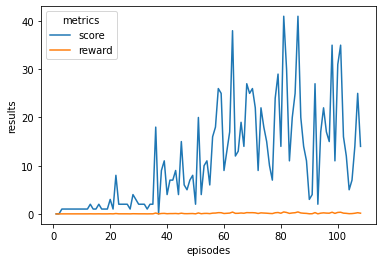

Run time: 600.0150225162506 seconds
Max. Score: 41
Mean Last Scores: 18.66


In [30]:
N0 = 0.1
gamma = 0.99

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 3
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 2
Game 19      Score: 0
Game 20      Score: 4
Game 21      Score: 1
Game 22      Score: 2
Game 23      Score: 2
Game 24      Score: 1
Game 25      Score: 0
Game 26      Score: 6
Game 27      Score: 1
Game 28      Score: 2
Game 29      Score: 4
Game 30      Score: 3
Game 31      Score: 6
Game 32      Score: 2
Game 33      Score: 5
Game 34      Score: 4
Game 35      Score: 4
Game 36      Score: 5
Game 37      Score: 5
Game 38      Score: 5
Game 39      Score: 2
Game 40      Score: 10
Game 41      Score: 5
Game 42      Score: 2
Game 43      Score: 8
Game 44      Score: 8
Game 45      Score: 4
Game 46      Score

Game 360      Score: 13
Game 361      Score: 33
Game 362      Score: 10
Game 363      Score: 20
Game 364      Score: 14
Game 365      Score: 29
Game 366      Score: 32
Game 367      Score: 7
Game 368      Score: 26
Game 369      Score: 21
Game 370      Score: 22
Game 371      Score: 15
Game 372      Score: 5
Game 373      Score: 8
Game 374      Score: 18
Game 375      Score: 11
Game 376      Score: 5
Game 377      Score: 4
Game 378      Score: 30
Game 379      Score: 20
Game 380      Score: 27
Game 381      Score: 7
Game 382      Score: 25
Game 383      Score: 20
Game 384      Score: 17
Game 385      Score: 18
Game 386      Score: 11
Game 387      Score: 20
Game 388      Score: 20
Game 389      Score: 9
Game 390      Score: 12
Game 391      Score: 13
Game 392      Score: 31
Game 393      Score: 12
Game 394      Score: 11
Game 395      Score: 17
Game 396      Score: 6
Game 397      Score: 32
Game 398      Score: 17
Game 399      Score: 3
Game 400      Score: 7
Game 401      Score: 10
Ga

Game 709      Score: 39
Game 710      Score: 28
Game 711      Score: 3
Game 712      Score: 9
Game 713      Score: 22
Game 714      Score: 16
Game 715      Score: 14
Game 716      Score: 6
Game 717      Score: 34
Game 718      Score: 21
Game 719      Score: 28
Game 720      Score: 29
Game 721      Score: 11
Game 722      Score: 29
Game 723      Score: 21
Game 724      Score: 16
Game 725      Score: 11
Game 726      Score: 9
Game 727      Score: 33
Game 728      Score: 5
Game 729      Score: 35
Game 730      Score: 12
Game 731      Score: 29
Game 732      Score: 9
Game 733      Score: 31
Game 734      Score: 6
Game 735      Score: 3
Game 736      Score: 10
Game 737      Score: 22
Game 738      Score: 14
Game 739      Score: 17
Game 740      Score: 42
Game 741      Score: 29
Game 742      Score: 24
Game 743      Score: 33
Game 744      Score: 15
Game 745      Score: 27
Game 746      Score: 17
Game 747      Score: 20
Game 748      Score: 9
Game 749      Score: 35
Game 750      Score: 34
G

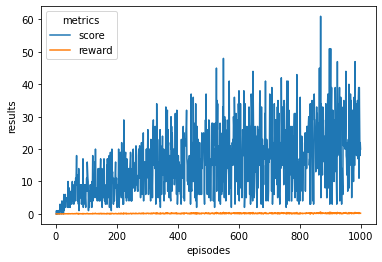

Run time: 25.40072512626648 seconds
Max. Score: 61
Mean Last Scores: 23.8


In [29]:
N0 = 2
gamma = 0.99

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

A partir desse experimento variando o valor de N0, tivemos a melhor configuração como ``N0 = 1`` e
``gamma = 0.99``

### Experimento 3: Variando a função de recompensa


Game 1      Score: 1
Game 2      Score: 0
Game 3      Score: 2
Game 4      Score: 2
Game 5      Score: 2
Game 6      Score: 4
Game 7      Score: 2
Game 8      Score: 3
Game 9      Score: 3
Game 10      Score: 2
Game 11      Score: 4
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 10
Game 15      Score: 6
Game 16      Score: 2
Game 17      Score: 1
Game 18      Score: 6
Game 19      Score: 6
Game 20      Score: 1
Game 21      Score: 4
Game 22      Score: 6
Game 23      Score: 8
Game 24      Score: 6
Game 25      Score: 6
Game 26      Score: 8
Game 27      Score: 11
Game 28      Score: 10
Game 29      Score: 2
Game 30      Score: 5
Game 31      Score: 3
Game 32      Score: 7
Game 33      Score: 3
Game 34      Score: 6
Game 35      Score: 6
Game 36      Score: 2
Game 37      Score: 11
Game 38      Score: 9
Game 39      Score: 5
Game 40      Score: 4
Game 41      Score: 7
Game 42      Score: 5
Game 43      Score: 2
Game 44      Score: 3
Game 45      Score: 4
Game 46      Sc

Game 354      Score: 21
Game 355      Score: 12
Game 356      Score: 35
Game 357      Score: 23
Game 358      Score: 38
Game 359      Score: 40
Game 360      Score: 15
Game 361      Score: 10
Game 362      Score: 12
Game 363      Score: 12
Game 364      Score: 14
Game 365      Score: 14
Game 366      Score: 15
Game 367      Score: 10
Game 368      Score: 9
Game 369      Score: 42
Game 370      Score: 26
Game 371      Score: 16
Game 372      Score: 9
Game 373      Score: 22
Game 374      Score: 22
Game 375      Score: 23
Game 376      Score: 29
Game 377      Score: 37
Game 378      Score: 26
Game 379      Score: 12
Game 380      Score: 41
Game 381      Score: 17
Game 382      Score: 17
Game 383      Score: 22
Game 384      Score: 39
Game 385      Score: 22
Game 386      Score: 32
Game 387      Score: 4
Game 388      Score: 14
Game 389      Score: 19
Game 390      Score: 36
Game 391      Score: 27
Game 392      Score: 28
Game 393      Score: 31
Game 394      Score: 41
Game 395      Score

Game 698      Score: 33
Game 699      Score: 31
Game 700      Score: 20
Game 701      Score: 22
Game 702      Score: 21
Game 703      Score: 32
Game 704      Score: 28
Game 705      Score: 30
Game 706      Score: 27
Game 707      Score: 21
Game 708      Score: 30
Game 709      Score: 16
Game 710      Score: 18
Game 711      Score: 34
Game 712      Score: 19
Game 713      Score: 15
Game 714      Score: 24
Game 715      Score: 13
Game 716      Score: 20
Game 717      Score: 15
Game 718      Score: 30
Game 719      Score: 12
Game 720      Score: 9
Game 721      Score: 40
Game 722      Score: 28
Game 723      Score: 28
Game 724      Score: 19
Game 725      Score: 13
Game 726      Score: 10
Game 727      Score: 25
Game 728      Score: 20
Game 729      Score: 29
Game 730      Score: 16
Game 731      Score: 37
Game 732      Score: 16
Game 733      Score: 29
Game 734      Score: 27
Game 735      Score: 45
Game 736      Score: 17
Game 737      Score: 43
Game 738      Score: 22
Game 739      Sco

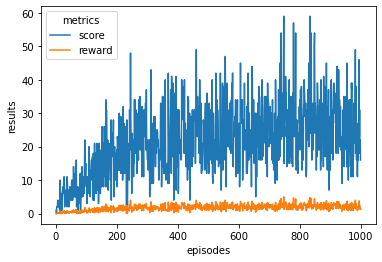

Run time: 33.5823757648468 seconds
Max. Score: 59
Mean Last Scores: 24.58


In [31]:
def reward1(env):
    """
    Return the reward.
    The reward is:
        -100 when Snake crashes.
        +100 when Snake eats food
        -1 otherwise
    """
    reward = -1
    if env.game.crash:
        reward = -100
    elif env.player.eaten:
        reward = 100

    return reward
    

N0 = 1.0
gamma = 0.99

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=reward1, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

In [32]:
import math
from scipy.spatial.distance import cityblock

def reward_exp(env, max_value, max_dist=3, dist_metric=cityblock):
    """
    Return the reward.
    The reward is:
        -100 when Snake crashes.
        +100 when Snake eats food
        +max_value * exp(dist[snake, food]) if dist[snake, food] <= max_dist
        -0.01*non_improvement otherwise
    """
    global non_improvement
    
    player_pos = [env.player.x, env.player.y]
    food_pos = [env.food.x_food, env.food.y_food]
    dist = dist_metric(player_pos, player_pos)
    
    reward = max_value * math.exp(dist)
    if env.game.crash:
        reward = -1000
    elif env.player.eaten:
        reward = 1000
        non_improvement = 0
    elif dist >= max_dist:
        reward = -non_improvement*0.01
        non_improvement += 1

    return reward

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 1
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 2
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 3
Game 28      Score: 1
Game 29      Score: 2
Game 30      Score: 2
Game 31      Score: 1
Game 32      Score: 1
Game 33      Score: 2
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 1
Game 37      Score: 1
Game 38      Score: 1
Game 39      Score: 3
Game 40      Score: 1
Game 41      Score: 1
Game 42      Score: 4
Game 43      Score: 1
Game 44      Score: 1
Game 45      Score: 2
Game 46      Score:

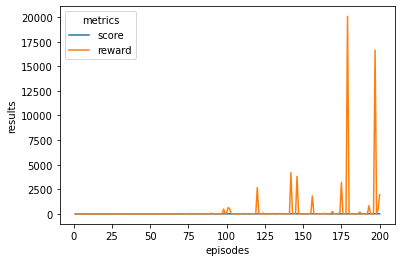

Run time: 600.0072150230408 seconds
Max. Score: 30
Mean Last Scores: 9.92


In [33]:
N0 = 1.0
gamma = 0.99
global non_improvement 
non_improvement = 0

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=lambda env: reward_exp(env, max_value=10),
                         episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

In [34]:
import math
from scipy.spatial.distance import cityblock

def reward_linear(env, penalty_rate=0.01, dist_metric=cityblock):
    """
    Return the reward.
    The reward is:
        -100 when Snake crashes.
        +100 when Snake eats food
        -0.01*non_improvement otherwise
    """
    global non_improvement
    reward = -non_improvement*penalty_rate
    if env.game.crash:
        reward = -100
    elif env.player.eaten:
        reward = 100
        non_improvement = 0
    else:
        non_improvement += 1

    return reward

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 2
Game 13      Score: 3
Game 14      Score: 1
Game 15      Score: 2
Game 16      Score: 4
Game 17      Score: 4
Game 18      Score: 6
Game 19      Score: 2
Game 20      Score: 8
Game 21      Score: 3
Game 22      Score: 1
Game 23      Score: 3
Game 24      Score: 2
Game 25      Score: 9
Game 26      Score: 7
Game 27      Score: 4
Game 28      Score: 12
Game 29      Score: 15
Game 30      Score: 4
Game 31      Score: 11
Game 32      Score: 5
Game 33      Score: 3
Game 34      Score: 6
Game 35      Score: 13
Game 36      Score: 6
Game 37      Score: 4
Game 38      Score: 1
Game 39      Score: 9
Game 40      Score: 8
Game 41      Score: 5
Game 42      Score: 8
Game 43      Score: 4
Game 44      Score: 11
Game 45      Score: 4
Game 46      S

Game 359      Score: 16
Game 360      Score: 2
Game 361      Score: 21
Game 362      Score: 19
Game 363      Score: 13
Game 364      Score: 28
Game 365      Score: 15
Game 366      Score: 26
Game 367      Score: 18
Game 368      Score: 4
Game 369      Score: 2
Game 370      Score: 10
Game 371      Score: 23
Game 372      Score: 34
Game 373      Score: 15
Game 374      Score: 7
Game 375      Score: 21
Game 376      Score: 26
Game 377      Score: 11
Game 378      Score: 38
Game 379      Score: 5
Game 380      Score: 29
Game 381      Score: 21
Game 382      Score: 23
Game 383      Score: 7
Game 384      Score: 9
Game 385      Score: 12
Game 386      Score: 30
Game 387      Score: 11
Game 388      Score: 11
Game 389      Score: 9
Game 390      Score: 8
Game 391      Score: 10
Game 392      Score: 14
Game 393      Score: 13
Game 394      Score: 23
Game 395      Score: 16
Game 396      Score: 6
Game 397      Score: 2
Game 398      Score: 26
Game 399      Score: 12
Game 400      Score: 13
Gam

Game 713      Score: 30
Game 714      Score: 11
Game 715      Score: 20
Game 716      Score: 5
Game 717      Score: 8
Game 718      Score: 19
Game 719      Score: 30
Game 720      Score: 20
Game 721      Score: 25
Game 722      Score: 15
Game 723      Score: 11
Game 724      Score: 38
Game 725      Score: 24
Game 726      Score: 14
Game 727      Score: 10
Game 728      Score: 15
Game 729      Score: 8
Game 730      Score: 34
Game 731      Score: 6
Game 732      Score: 9
Game 733      Score: 24
Game 734      Score: 23
Game 735      Score: 33
Game 736      Score: 28
Game 737      Score: 7
Game 738      Score: 10
Game 739      Score: 31
Game 740      Score: 23
Game 741      Score: 23
Game 742      Score: 3
Game 743      Score: 3
Game 744      Score: 10
Game 745      Score: 12
Game 746      Score: 24
Game 747      Score: 21
Game 748      Score: 4
Game 749      Score: 13
Game 750      Score: 34
Game 751      Score: 23
Game 752      Score: 14
Game 753      Score: 20
Game 754      Score: 29
G

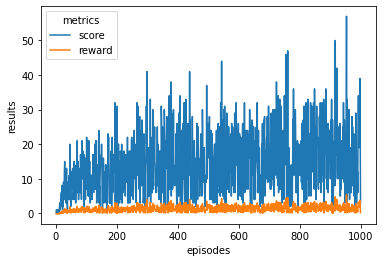

Run time: 18.945865154266357 seconds
Max. Score: 57
Mean Last Scores: 17.1


In [35]:
N0 = 1.0
gamma = 0.99
global non_improvement 
non_improvement = 0

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=reward_linear,
                         episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 2
Game 13      Score: 3
Game 14      Score: 1
Game 15      Score: 2
Game 16      Score: 4
Game 17      Score: 4
Game 18      Score: 6
Game 19      Score: 2
Game 20      Score: 8
Game 21      Score: 3
Game 22      Score: 1
Game 23      Score: 3
Game 24      Score: 2
Game 25      Score: 9
Game 26      Score: 7
Game 27      Score: 4
Game 28      Score: 12
Game 29      Score: 15
Game 30      Score: 4
Game 31      Score: 11
Game 32      Score: 5
Game 33      Score: 3
Game 34      Score: 6
Game 35      Score: 13
Game 36      Score: 6
Game 37      Score: 4
Game 38      Score: 1
Game 39      Score: 9
Game 40      Score: 8
Game 41      Score: 4
Game 42      Score: 3
Game 43      Score: 9
Game 44      Score: 7
Game 45      Score: 6
Game 46      Sc

Game 353      Score: 22
Game 354      Score: 24
Game 355      Score: 27
Game 356      Score: 5
Game 357      Score: 32
Game 358      Score: 44
Game 359      Score: 29
Game 360      Score: 18
Game 361      Score: 29
Game 362      Score: 34
Game 363      Score: 35
Game 364      Score: 24
Game 365      Score: 17
Game 366      Score: 17
Game 367      Score: 24
Game 368      Score: 21
Game 369      Score: 29
Game 370      Score: 27
Game 371      Score: 39
Game 372      Score: 24
Game 373      Score: 21
Game 374      Score: 44
Game 375      Score: 21
Game 376      Score: 18
Game 377      Score: 30
Game 378      Score: 23
Game 379      Score: 40
Game 380      Score: 24
Game 381      Score: 9
Game 382      Score: 24
Game 383      Score: 41
Game 384      Score: 27
Game 385      Score: 26
Game 386      Score: 39
Game 387      Score: 38
Game 388      Score: 30
Game 389      Score: 19
Game 390      Score: 23
Game 391      Score: 36
Game 392      Score: 27
Game 393      Score: 36
Game 394      Scor

Game 697      Score: 27
Game 698      Score: 32
Game 699      Score: 29
Game 700      Score: 19
Game 701      Score: 11
Game 702      Score: 35
Game 703      Score: 24
Game 704      Score: 55
Game 705      Score: 8
Game 706      Score: 38
Game 707      Score: 34
Game 708      Score: 31
Game 709      Score: 49
Game 710      Score: 18
Game 711      Score: 45
Game 712      Score: 37
Game 713      Score: 28
Game 714      Score: 13
Game 715      Score: 28
Game 716      Score: 36
Game 717      Score: 47
Game 718      Score: 49
Game 719      Score: 34
Game 720      Score: 20
Game 721      Score: 65
Game 722      Score: 43
Game 723      Score: 20
Game 724      Score: 16
Game 725      Score: 44
Game 726      Score: 53
Game 727      Score: 29
Game 728      Score: 22
Game 729      Score: 16
Game 730      Score: 38
Game 731      Score: 34
Game 732      Score: 18
Game 733      Score: 26
Game 734      Score: 22
Game 735      Score: 24
Game 736      Score: 41
Game 737      Score: 21
Game 738      Sco

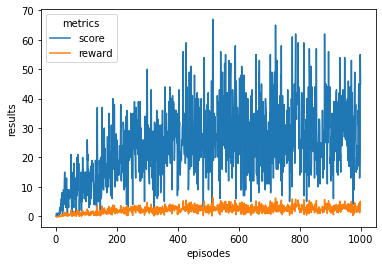

Run time: 26.868289470672607 seconds
Max. Score: 67
Mean Last Scores: 29.24


In [36]:
N0 = 1.0
gamma = 0.99
global non_improvement 
non_improvement = 0

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=lambda env: reward_linear(env, penalty_rate=0.02),
                             episodes=1000, speed=0, display=False, verbose=True)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 2
Game 13      Score: 3
Game 14      Score: 1
Game 15      Score: 2
Game 16      Score: 4
Game 17      Score: 2
Game 18      Score: 5
Game 19      Score: 2
Game 20      Score: 1
Game 21      Score: 3
Game 22      Score: 5
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 4
Game 26      Score: 1
Game 27      Score: 10
Game 28      Score: 8
Game 29      Score: 3
Game 30      Score: 2
Game 31      Score: 4
Game 32      Score: 6
Game 33      Score: 3
Game 34      Score: 2
Game 35      Score: 6
Game 36      Score: 4
Game 37      Score: 4
Game 38      Score: 9
Game 39      Score: 6
Game 40      Score: 8
Game 41      Score: 5
Game 42      Score: 2
Game 43      Score: 3
Game 44      Score: 10
Game 45      Score: 3
Game 46      Scor

Game 357      Score: 37
Game 358      Score: 30
Game 359      Score: 22
Game 360      Score: 26
Game 361      Score: 29
Game 362      Score: 16
Game 363      Score: 15
Game 364      Score: 38
Game 365      Score: 27
Game 366      Score: 34
Game 367      Score: 17
Game 368      Score: 28
Game 369      Score: 20
Game 370      Score: 40
Game 371      Score: 35
Game 372      Score: 39
Game 373      Score: 29
Game 374      Score: 29
Game 375      Score: 9
Game 376      Score: 15
Game 377      Score: 16
Game 378      Score: 23
Game 379      Score: 33
Game 380      Score: 36
Game 381      Score: 30
Game 382      Score: 20
Game 383      Score: 14
Game 384      Score: 25
Game 385      Score: 24
Game 386      Score: 27
Game 387      Score: 23
Game 388      Score: 31
Game 389      Score: 20
Game 390      Score: 10
Game 391      Score: 17
Game 392      Score: 7
Game 393      Score: 30
Game 394      Score: 13
Game 395      Score: 26
Game 396      Score: 17
Game 397      Score: 28
Game 398      Scor

Game 707      Score: 17
Game 708      Score: 7
Game 709      Score: 37
Game 710      Score: 9
Game 711      Score: 27
Game 712      Score: 25
Game 713      Score: 39
Game 714      Score: 17
Game 715      Score: 23
Game 716      Score: 32
Game 717      Score: 17
Game 718      Score: 6
Game 719      Score: 16
Game 720      Score: 21
Game 721      Score: 27
Game 722      Score: 7
Game 723      Score: 14
Game 724      Score: 30
Game 725      Score: 20
Game 726      Score: 3
Game 727      Score: 8
Game 728      Score: 14
Game 729      Score: 4
Game 730      Score: 16
Game 731      Score: 36
Game 732      Score: 28
Game 733      Score: 19
Game 734      Score: 21
Game 735      Score: 3
Game 736      Score: 22
Game 737      Score: 27
Game 738      Score: 49
Game 739      Score: 27
Game 740      Score: 39
Game 741      Score: 10
Game 742      Score: 4
Game 743      Score: 35
Game 744      Score: 5
Game 745      Score: 17
Game 746      Score: 36
Game 747      Score: 9
Game 748      Score: 18
Gam

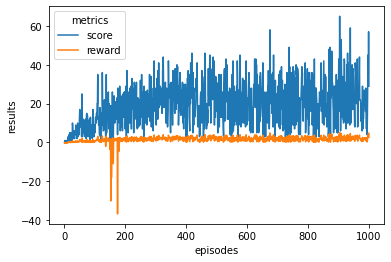

Run time: 23.381409645080566 seconds
Max. Score: 65
Mean Last Scores: 23.34


In [37]:
N0 = 1.0
gamma = 0.99
global non_improvement 
non_improvement = 0

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=lambda env: reward_linear(env, penalty_rate=0.05),
                             episodes=1000, speed=0, display=False, verbose=True)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 2
Game 13      Score: 3
Game 14      Score: 1
Game 15      Score: 3
Game 16      Score: 3
Game 17      Score: 1
Game 18      Score: 3
Game 19      Score: 2
Game 20      Score: 5
Game 21      Score: 5
Game 22      Score: 1
Game 23      Score: 2
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 2
Game 27      Score: 2
Game 28      Score: 1
Game 29      Score: 4
Game 30      Score: 1
Game 31      Score: 10
Game 32      Score: 3
Game 33      Score: 5
Game 34      Score: 4
Game 35      Score: 6
Game 36      Score: 10
Game 37      Score: 3
Game 38      Score: 2
Game 39      Score: 6
Game 40      Score: 4
Game 41      Score: 5
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 4
Game 45      Score: 4
Game 46      Scor

Game 354      Score: 41
Game 355      Score: 25
Game 356      Score: 29
Game 357      Score: 14
Game 358      Score: 30
Game 359      Score: 21
Game 360      Score: 10
Game 361      Score: 54
Game 362      Score: 35
Game 363      Score: 41
Game 364      Score: 4
Game 365      Score: 16
Game 366      Score: 16
Game 367      Score: 19
Game 368      Score: 23
Game 369      Score: 14
Game 370      Score: 4
Game 371      Score: 54
Game 372      Score: 12
Game 373      Score: 17
Game 374      Score: 27
Game 375      Score: 23
Game 376      Score: 23
Game 377      Score: 21
Game 378      Score: 28
Game 379      Score: 26
Game 380      Score: 26
Game 381      Score: 31
Game 382      Score: 37
Game 383      Score: 39
Game 384      Score: 8
Game 385      Score: 28
Game 386      Score: 47
Game 387      Score: 17
Game 388      Score: 19
Game 389      Score: 31
Game 390      Score: 25
Game 391      Score: 31
Game 392      Score: 61
Game 393      Score: 23
Game 394      Score: 30
Game 395      Score

Game 697      Score: 24
Game 698      Score: 43
Game 699      Score: 23
Game 700      Score: 45
Game 701      Score: 11
Game 702      Score: 52
Game 703      Score: 39
Game 704      Score: 40
Game 705      Score: 24
Game 706      Score: 25
Game 707      Score: 43
Game 708      Score: 34
Game 709      Score: 33
Game 710      Score: 19
Game 711      Score: 60
Game 712      Score: 62
Game 713      Score: 13
Game 714      Score: 41
Game 715      Score: 30
Game 716      Score: 19
Game 717      Score: 5
Game 718      Score: 30
Game 719      Score: 42
Game 720      Score: 43
Game 721      Score: 39
Game 722      Score: 51
Game 723      Score: 45
Game 724      Score: 9
Game 725      Score: 25
Game 726      Score: 14
Game 727      Score: 32
Game 728      Score: 24
Game 729      Score: 43
Game 730      Score: 35
Game 731      Score: 27
Game 732      Score: 41
Game 733      Score: 36
Game 734      Score: 19
Game 735      Score: 17
Game 736      Score: 3
Game 737      Score: 17
Game 738      Score

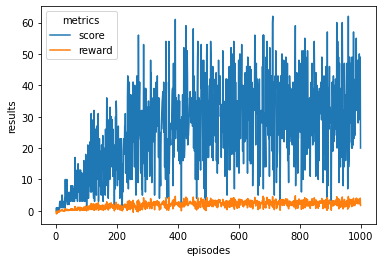

Run time: 35.06679105758667 seconds
Max. Score: 62
Mean Last Scores: 33.5


In [38]:
N0 = 1.0
gamma = 0.99
global non_improvement 
non_improvement = 0

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=lambda env: reward_linear(env, penalty_rate=0.1),
                             episodes=1000, speed=0, display=False, verbose=True)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 2
Game 13      Score: 3
Game 14      Score: 1
Game 15      Score: 3
Game 16      Score: 3
Game 17      Score: 1
Game 18      Score: 3
Game 19      Score: 2
Game 20      Score: 5
Game 21      Score: 5
Game 22      Score: 1
Game 23      Score: 2
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 2
Game 27      Score: 2
Game 28      Score: 1
Game 29      Score: 4
Game 30      Score: 1
Game 31      Score: 10
Game 32      Score: 3
Game 33      Score: 3
Game 34      Score: 2
Game 35      Score: 4
Game 36      Score: 1
Game 37      Score: 3
Game 38      Score: 3
Game 39      Score: 1
Game 40      Score: 2
Game 41      Score: 2
Game 42      Score: 5
Game 43      Score: 6
Game 44      Score: 4
Game 45      Score: 1
Game 46      Score

Game 353      Score: 38
Game 354      Score: 33
Game 355      Score: 14
Game 356      Score: 21
Game 357      Score: 20
Game 358      Score: 27
Game 359      Score: 30
Game 360      Score: 24
Game 361      Score: 27
Game 362      Score: 22
Game 363      Score: 19
Game 364      Score: 35
Game 365      Score: 26
Game 366      Score: 26
Game 367      Score: 14
Game 368      Score: 41
Game 369      Score: 15
Game 370      Score: 13
Game 371      Score: 38
Game 372      Score: 29
Game 373      Score: 20
Game 374      Score: 24
Game 375      Score: 17
Game 376      Score: 47
Game 377      Score: 22
Game 378      Score: 23
Game 379      Score: 22
Game 380      Score: 22
Game 381      Score: 23
Game 382      Score: 37
Game 383      Score: 30
Game 384      Score: 49
Game 385      Score: 15
Game 386      Score: 30
Game 387      Score: 45
Game 388      Score: 19
Game 389      Score: 34
Game 390      Score: 37
Game 391      Score: 28
Game 392      Score: 39
Game 393      Score: 32
Game 394      Sc

Game 700      Score: 26
Game 701      Score: 44
Game 702      Score: 13
Game 703      Score: 43
Game 704      Score: 39
Game 705      Score: 49
Game 706      Score: 43
Game 707      Score: 33
Game 708      Score: 33
Game 709      Score: 36
Game 710      Score: 19
Game 711      Score: 33
Game 712      Score: 42
Game 713      Score: 46
Game 714      Score: 23
Game 715      Score: 52
Game 716      Score: 6
Game 717      Score: 35
Game 718      Score: 23
Game 719      Score: 44
Game 720      Score: 14
Game 721      Score: 50
Game 722      Score: 20
Game 723      Score: 39
Game 724      Score: 39
Game 725      Score: 52
Game 726      Score: 44
Game 727      Score: 20
Game 728      Score: 23
Game 729      Score: 47
Game 730      Score: 40
Game 731      Score: 30
Game 732      Score: 18
Game 733      Score: 22
Game 734      Score: 44
Game 735      Score: 15
Game 736      Score: 40
Game 737      Score: 41
Game 738      Score: 31
Game 739      Score: 38
Game 740      Score: 46
Game 741      Sco

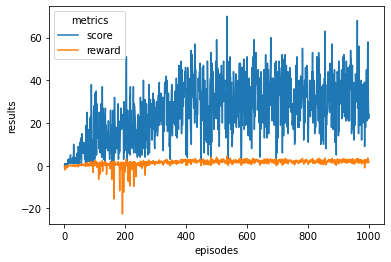

Run time: 33.82561230659485 seconds
Max. Score: 70
Mean Last Scores: 31.86


In [39]:
N0 = 1.0
gamma = 0.99
global non_improvement 
non_improvement = 0

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=lambda env: reward_linear(env, penalty_rate=0.2),
                             episodes=1000, speed=0, display=False, verbose=True)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 1
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 1
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 1
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 1
Game 14      Score: 0
Game 15      Score: 2
Game 16      Score: 0
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 2
Game 20      Score: 2
Game 21      Score: 1
Game 22      Score: 3
Game 23      Score: 2
Game 24      Score: 1
Game 25      Score: 3
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 3
Game 29      Score: 1
Game 30      Score: 2
Game 31      Score: 2
Game 32      Score: 1
Game 33      Score: 3
Game 34      Score: 2
Game 35      Score: 2
Game 36      Score: 2
Game 37      Score: 1
Game 38      Score: 2
Game 39      Score: 2
Game 40      Score: 3
Game 41      Score: 2
Game 42      Score: 1
Game 43      Score: 4
Game 44      Score: 2
Game 45      Score: 8
Game 46      Score:

Game 355      Score: 29
Game 356      Score: 12
Game 357      Score: 24
Game 358      Score: 33
Game 359      Score: 16
Game 360      Score: 33
Game 361      Score: 6
Game 362      Score: 23
Game 363      Score: 36
Game 364      Score: 19
Game 365      Score: 28
Game 366      Score: 28
Game 367      Score: 16
Game 368      Score: 31
Game 369      Score: 18
Game 370      Score: 21
Game 371      Score: 28
Game 372      Score: 24
Game 373      Score: 6
Game 374      Score: 11
Game 375      Score: 30
Game 376      Score: 42
Game 377      Score: 34
Game 378      Score: 27
Game 379      Score: 23
Game 380      Score: 3
Game 381      Score: 32
Game 382      Score: 13
Game 383      Score: 21
Game 384      Score: 16
Game 385      Score: 21
Game 386      Score: 22
Game 387      Score: 27
Game 388      Score: 30
Game 389      Score: 19
Game 390      Score: 19
Game 391      Score: 25
Game 392      Score: 21
Game 393      Score: 45
Game 394      Score: 36
Game 395      Score: 8
Game 396      Score:

Game 702      Score: 32
Game 703      Score: 33
Game 704      Score: 40
Game 705      Score: 29
Game 706      Score: 11
Game 707      Score: 35
Game 708      Score: 22
Game 709      Score: 38
Game 710      Score: 41
Game 711      Score: 24
Game 712      Score: 22
Game 713      Score: 21
Game 714      Score: 32
Game 715      Score: 40
Game 716      Score: 19
Game 717      Score: 27
Game 718      Score: 42
Game 719      Score: 35
Game 720      Score: 43
Game 721      Score: 28
Game 722      Score: 31
Game 723      Score: 22
Game 724      Score: 44
Game 725      Score: 8
Game 726      Score: 41
Game 727      Score: 29
Game 728      Score: 48
Game 729      Score: 28
Game 730      Score: 18
Game 731      Score: 28
Game 732      Score: 32
Game 733      Score: 31
Game 734      Score: 28
Game 735      Score: 15
Game 736      Score: 40
Game 737      Score: 42
Game 738      Score: 6
Game 739      Score: 8
Game 740      Score: 19
Game 741      Score: 43
Game 742      Score: 26
Game 743      Score

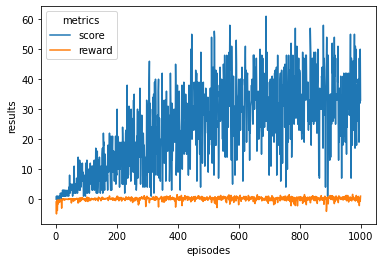

Run time: 32.075374126434326 seconds
Max. Score: 61
Mean Last Scores: 33.56


In [40]:
N0 = 1.0
gamma = 0.99
global non_improvement 
non_improvement = 0

# define agent
sarsaAgent = SARSAAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=lambda env: reward_linear(env, penalty_rate=0.5),
                             episodes=1000, speed=0, display=False, verbose=True)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

A configuração que resultou na melhor pontuação média para os últimos 50 episódios foi `N0 = 1.0`
`gamma = 0.99` e função de recompensa padrão. Assim, a cobra atingiu o tamanho 72, tendo tamanho médio nos últimos 50 episódios igual a 41.